In [75]:
import tensorflow as tf
import os 
%pip install Pillow
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [76]:
gpus = tf.config.experimental.list_logical_devices("GPU")

In [77]:
gpus

[]

In [78]:
gpus = tf.config.experimental.list_logical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [79]:
import cv2
import imghdr

In [80]:
data_dir = 'data'

In [81]:
image_exts = ['jpeg','jpg','bmp','png']

In [82]:
for image_class in os.listdir(data_dir):
    # Define 'class_path' inside the loop
    class_path = os.path.join(data_dir, image_class)

    # Check if it's a directory to avoid .DS_Store and similar files
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path))
                
                # os.remove(image_path)

In [83]:
from PIL import Image
import os
import imghdr

data_dir = 'data'  # Replace with your actual data directory path
target_format = 'JPEG'

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        filepath = os.path.join(subdir, file)

        # Skip files that are not images
        if imghdr.what(filepath) is None:
            print('Skipping non-image file:', filepath)
            continue

        try:
            # Check if the image format is one of the expected types
            image_type = imghdr.what(filepath)
            if image_type not in ['jpeg', 'png', 'gif', 'bmp']:
                print('Unsupported image format:', filepath)

                # Convert the file to JPEG (or another supported format)
                img = Image.open(filepath)
                converted_filepath = os.path.splitext(filepath)[0] + '.' + target_format.lower()
                img.convert('RGB').save(converted_filepath, target_format)
                os.remove(filepath)  # Remove the original file
                print('Converted and saved:', converted_filepath)
                
        except Exception as e:
            print('Error processing file:', filepath, '\nError:', e)



Skipping non-image file: data/.DS_Store


In [84]:
import numpy as np

from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 226 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [87]:
batch = data_iterator.next()

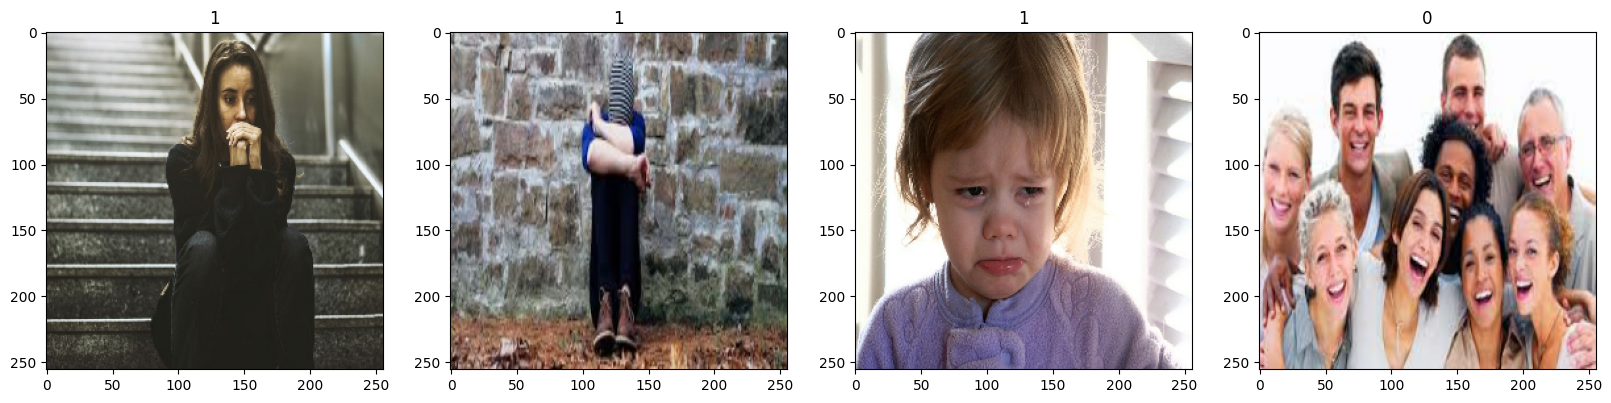

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [89]:
data = data.map(lambda x,y: (x/255, y))

In [90]:
data.as_numpy_iterator().next()

(array([[[[0.38504136, 0.38504136, 0.38504136],
          [0.4052313 , 0.4052313 , 0.4052313 ],
          [0.41495863, 0.41495863, 0.41495863],
          ...,
          [0.28857997, 0.28857997, 0.28857997],
          [0.29803923, 0.29803923, 0.29803923],
          [0.29803923, 0.29803923, 0.29803923]],
 
         [[0.34066185, 0.34066185, 0.34066185],
          [0.4349097 , 0.4349097 , 0.4349097 ],
          [0.45533195, 0.45533195, 0.45533195],
          ...,
          [0.3224048 , 0.3224048 , 0.3224048 ],
          [0.33394608, 0.33394608, 0.33394608],
          [0.33394608, 0.33394608, 0.33394608]],
 
         [[0.32541975, 0.32541975, 0.32541975],
          [0.44232804, 0.44232804, 0.44232804],
          [0.46470767, 0.46470767, 0.46470767],
          ...,
          [0.350693  , 0.350693  , 0.350693  ],
          [0.36191022, 0.36191022, 0.36191022],
          [0.36191022, 0.36191022, 0.36191022]],
 
         ...,
 
         [[0.50282425, 0.50282425, 0.50282425],
          [0.51659

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [92]:
train_size

5

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [95]:
model = Sequential()

In [96]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [99]:
logdir='logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 3s 444ms/step - loss: 0.9882 - accuracy: 0.4625 - val_loss: 0.6842 - val_accuracy: 0.5938
Epoch 2/20
5/5 [==============================] - 3s 423ms/step - loss: 0.6729 - accuracy: 0.6250 - val_loss: 0.6984 - val_accuracy: 0.4688
Epoch 3/20
5/5 [==============================] - 3s 421ms/step - loss: 0.6797 - accuracy: 0.5688 - val_loss: 0.6742 - val_accuracy: 0.5938
Epoch 4/20
5/5 [==============================] - 3s 422ms/step - loss: 0.6608 - accuracy: 0.6125 - val_loss: 0.6403 - val_accuracy: 0.5625
Epoch 5/20
5/5 [==============================] - 3s 415ms/step - loss: 0.6407 - accuracy: 0.6000 - val_loss: 0.6110 - val_accuracy: 0.7812
Epoch 6/20
5/5 [==============================] - 3s 423ms/step - loss: 0.5864 - accuracy: 0.7937 - val_loss: 0.6648 - val_accuracy: 0.5625
Epoch 7/20
5/5 [==============================] - 3s 415ms/step - loss: 0.5216 - accuracy: 0.7812 - val_loss: 0.4545 - val_accuracy: 0.8125
Epoch 8/20
5/5 [====